In [ ]:
import pandas as pd

df = pd.read_csv('C:\\Users\\TheAncientOwl\\Code\\data-analysis-tool\\server\\common\\test-data\\pca-data.agriculture.csv')

df.head()


In [ ]:
label_tag = 'Country'
feature_tags = ['EA', 'EAM', 'EAF', 'AFF', 'ANE', 'AME', 'CY', 
            'SA', 'CP', 'LA', 'LCP', 'ARL', 'AGL']

labels = df[label_tag].values

features = df[feature_tags].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(features)


1. Hierarchycal clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(features, 'single')

plt.figure(figsize=(20, 20))
dendrogram(linked,
           orientation='top',
           labels=labels,
           distance_sort='ascending',
           show_leaf_counts=True)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(features)

result_df = pd.DataFrame({'Cluster': cluster.labels_}, index=labels)

result_df.head(10)


2. K-Means

In [42]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Elbow method

c:\Users\TheAncientOwl\anaconda3\envs\mango-backend\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


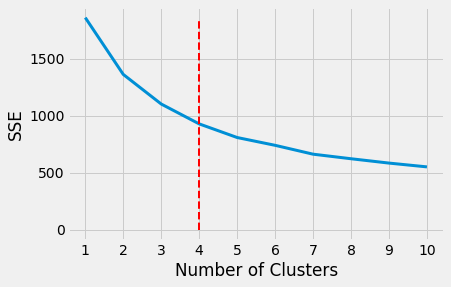

In [43]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(features)
  sse.append(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse, linewidth=3)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

k1 = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')

k1.elbow
plt.vlines(x=k1.elbow, ymin=0, ymax=max(sse), colors='red',
           linewidth=2.0, linestyles='dashed')


Silhouette coefficient

Text(0, 0.5, 'Silhouette Coefficient')

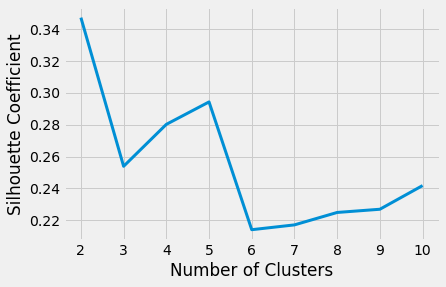

In [44]:
silhouette_coefficients  = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(features)
  score = silhouette_score(features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, linewidth=3)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")


Clustering

In [54]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(features)


KMeans(init='random', n_clusters=4, random_state=42)

In [56]:
kmeans.inertia_


927.6140051457431

In [65]:
kmeans.cluster_centers_
[f'Cluster {x}' for x in range(0, len(kmeans.cluster_centers_) + 1)]


['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

In [39]:
kmeans.n_iter_


7

In [50]:
result_df = pd.DataFrame({'Cluster': kmeans.labels_}, index=labels)

result_df.head(10)


,Cluster
Aruba,2
Afghanistan,1
Albania,3
Andorra,2
Armenia,0
Austria,0
Azerbaijan,3
Belgium,0
Benin,3
Burkina Faso,3
